In [1]:
# importing required modules
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
import warnings
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.
c:\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as

In [2]:
import tensorflow as tf

In [3]:
# VGG 16 CNN Architecture
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(272, 363, 3)),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The third convolution
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The fourth convolution
    tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The Fifth convolution
    tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(25, activation='softmax')
])


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 272, 363, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 272, 363, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 136, 181, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 136, 181, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 68, 90, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 68, 90, 256)       295168    
____

# 

In [4]:
#from pathlib import Path

#root_dir = path_images
#root = Path(root_dir)

In [5]:
#rm -rf `find -type d -name .ipynb_checkpoints`

In [6]:
# augmenting the ibput imges
image_gen = ImageDataGenerator(width_shift_range=0.1, # Shift the pic width by a max of 10%
                               validation_split = 0.2, # Split the Data into 80,20 %
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allow horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )
# initializing paths of input images         
path_images = 'Dataset/train'
image_gen.flow_from_directory(path_images)
#image_gen.flow_from_directory('/home/ec2-user/SageMaker/Training_Data/Corn_Valid_Data')

#print(image_gen)

batch_size = 32
image_shape = (272,363,3)

# train on images
train_image_gen = image_gen.flow_from_directory(path_images ,
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                                shuffle = True,
                                                subset='training',
                                               class_mode='categorical')

valid_image_gen = image_gen.flow_from_directory(path_images,
                                                target_size=image_shape[:2],
                                               batch_size=batch_size,
                                                shuffle = True,
                                                subset='validation',
                                               class_mode='categorical')

Found 25414 images belonging to 25 classes.
Found 20341 images belonging to 25 classes.
Found 5073 images belonging to 25 classes.


In [7]:
valid_image_gen.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Grape___Black_rot': 4,
 'Grape___Esca_(Black_Measles)': 5,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 6,
 'Grape___healthy': 7,
 'Peach___Bacterial_spot': 8,
 'Peach___healthy': 9,
 'Potato___Early_blight': 10,
 'Potato___Late_blight': 11,
 'Potato___healthy': 12,
 'Strawberry___Leaf_scorch': 13,
 'Strawberry___healthy': 14,
 'Tomato___Bacterial_spot': 15,
 'Tomato___Early_blight': 16,
 'Tomato___Late_blight': 17,
 'Tomato___Leaf_Mold': 18,
 'Tomato___Septoria_leaf_spot': 19,
 'Tomato___Spider_mites Two-spotted_spider_mite': 20,
 'Tomato___Target_Spot': 21,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 22,
 'Tomato___Tomato_mosaic_virus': 23,
 'Tomato___healthy': 24}

In [8]:
pwd

'C:\\Users\\Murtaza\\Plant_Diseases'

In [9]:
warnings.filterwarnings('ignore')

#es = EarlyStopping(monitor='val_acc', mode='max', verbose=1 , patience = 10)
cb = []
checkpoint_dir = 'Checkpoints'
ckp_saver = ModelCheckpoint(checkpoint_dir + "/model.{epoch:02d}-{loss:.2f}.h5", monitor='loss', verbose=0,
                                    save_best_only=True,
                                    save_weights_only=True, mode='auto', period=10)
cb.append(ckp_saver)


results = model.fit_generator(train_image_gen,epochs=50,
                              steps_per_epoch=train_image_gen.samples//batch_size,
                              validation_data=valid_image_gen,
                             validation_steps=valid_image_gen.samples//batch_size,
                             callbacks=cb)
model.save('Plant_Classifier_80_20.h5')

Epoch 1/50
635/635 [==============================] - 382s 602ms/step - loss: 2.0375 - acc: 0.3855 - val_loss: 1.2033 - val_acc: 0.6088
Epoch 2/50
635/635 [==============================] - 373s 587ms/step - loss: 1.0221 - acc: 0.6643 - val_loss: 0.7889 - val_acc: 0.7306
Epoch 3/50
635/635 [==============================] - 373s 587ms/step - loss: 0.7281 - acc: 0.7573 - val_loss: 0.5820 - val_acc: 0.8002
Epoch 4/50
635/635 [==============================] - 373s 587ms/step - loss: 0.5390 - acc: 0.8159 - val_loss: 0.4436 - val_acc: 0.8536
Epoch 5/50
635/635 [==============================] - 372s 585ms/step - loss: 0.4393 - acc: 0.8508 - val_loss: 0.4400 - val_acc: 0.8540
Epoch 6/50
635/635 [==============================] - 371s 585ms/step - loss: 0.3682 - acc: 0.8746 - val_loss: 0.3292 - val_acc: 0.8877
Epoch 7/50
635/635 [==============================] - 371s 585ms/step - loss: 0.3028 - acc: 0.8985 - val_loss: 0.3518 - val_acc: 0.8912
Epoch 8/50
635/635 [============================

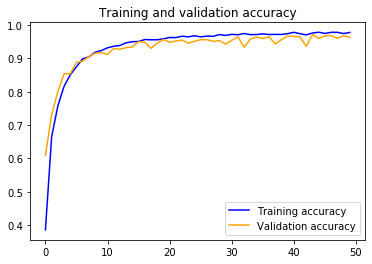

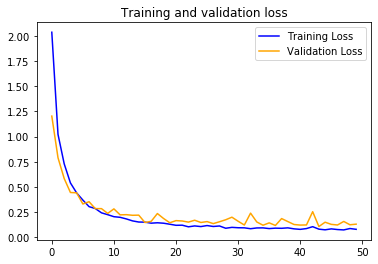

In [23]:
import matplotlib.pyplot as plt
acc = results.history['acc']
val_acc = results.history['val_acc']
loss = results.history['loss']
val_loss = results.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'blue', label='Training accuracy')
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'blue', label='Training Loss')
plt.plot(epochs, val_loss, 'orange', label='Validation Loss')
plt.title('Training and validation loss')

plt.legend()

# save plot to file
plt.savefig("loss_80_20.png")

plt.show()

In [26]:
loaded_model = load_model('Plant_Classifier_80_20.h5')
loaded_model.layers[0].input_shape #(None, 160, 160, 3)
loaded_model.summary()

ValueError: Unknown initializer: GlorotUniform

In [30]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory('Dataset/val',
                                                        target_size=image_shape[:2],
                                                        batch_size=batch_size,
                                                        shuffle = False,
                                                        class_mode='categorical')

Found 6353 images belonging to 25 classes.


In [37]:
import numpy as np
valid_image_gen.reset()
#Y_pred = model.predict_generator(valid_image_gen, 6353 // batch_size+1)
Y_pred = model.predict_generator(test_generator, 6353 // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
#target_names = ['cup_cakes', 'french_fries', 'greek_salad' , 'hamburger' , 'pizza' , 'steak']
print(classification_report(test_generator.classes, y_pred))

Confusion Matrix
[[ 114    2    0    4    0    0    0    0    2    0    0    3    0    0
     0    1    0    0    0    0    0    0    0    0    0]
 [   0  125    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]
 [   0    0   46    0    0    0    0    0    2    0    0    5    0    0
     0    1    1    0    0    0    0    0    0    0    0]
 [   3    0    0  326    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]
 [   0    1    0    0  233    2    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    3  273    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0  215    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0   83    0    0    0    0    0    0
 

In [38]:
from sklearn.metrics import plot_confusion_matrix
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

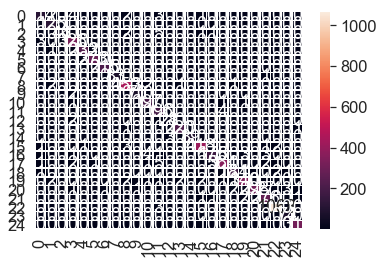

In [42]:
from sklearn.metrics import plot_confusion_matrix
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

def Confusion_Matrix_Built_IN():

    CM = confusion_matrix(test_generator.classes, y_pred)
    #print(CM)
    df_cm = pd.DataFrame(CM, range(25), range(25))

    sn.set(font_scale=1.5)#for label size
    sn.heatmap(df_cm,vmin=1,vmax=max(CM.diagonal()),linewidth=.5 ,annot=True,fmt="d",xticklabels=True, yticklabels=True)# font size
    
    plt.show()

Confusion_Matrix_Built_IN()

In [43]:
validation_score = model.evaluate_generator(valid_image_gen , 600 // 16)
validation_score

[0.10437736345763393, 0.9704392]

In [44]:
training_score = model.evaluate_generator(train_image_gen , 4200 // 16)
training_score

[0.04780865935887564, 0.98413646]

In [45]:
loss_model = results.history["loss"]
acc_model = results.history["acc"]

In [46]:
loss_model

[2.0374161452825383,
 1.0218026213235285,
 0.7280643172516265,
 0.5389035327893908,
 0.43921574343430064,
 0.36826336211541644,
 0.3028375992271806,
 0.2841152954391529,
 0.24124278197924093,
 0.22300832248184868,
 0.20287751744787122,
 0.19673841952356033,
 0.18075501294615373,
 0.1610515373596865,
 0.1497699787451466,
 0.14868493471400113,
 0.13848962945349724,
 0.142307568162282,
 0.13801699400526293,
 0.1279131221961054,
 0.11724783865064221,
 0.11837163320196153,
 0.1021953274278672,
 0.11094432713410617,
 0.10459862702085322,
 0.11463078750931455,
 0.10555734668763286,
 0.11053975360931467,
 0.08787859236358186,
 0.09680336813755938,
 0.09293684185180773,
 0.09203718267687978,
 0.08335475512024561,
 0.09090918069083996,
 0.091601433543777,
 0.08465714094305304,
 0.08887735300164658,
 0.08744232244986681,
 0.09180853874949026,
 0.08191713117830886,
 0.07688116736016393,
 0.0847085686605742,
 0.10359631030548787,
 0.07890855941869057,
 0.07231084147484809,
 0.08171376763304448,
 0.

In [47]:
acc_model

[0.38554335,
 0.6642868,
 0.75734895,
 0.8158944,
 0.85080504,
 0.8746369,
 0.8985179,
 0.90442663,
 0.91826284,
 0.9231868,
 0.9315082,
 0.93618596,
 0.93850017,
 0.9465754,
 0.94977593,
 0.95066226,
 0.95632476,
 0.9555862,
 0.9555862,
 0.9584421,
 0.9624305,
 0.96218425,
 0.96617264,
 0.9644,
 0.9676006,
 0.9643015,
 0.966665,
 0.9659264,
 0.97119504,
 0.9686346,
 0.97188437,
 0.9707519,
 0.9743956,
 0.9709981,
 0.971392,
 0.97336155,
 0.971392,
 0.971752,
 0.97157353,
 0.9739524,
 0.97790354,
 0.97374123,
 0.9703087,
 0.9759712,
 0.978187,
 0.97459257,
 0.9779408,
 0.9779408,
 0.9742971,
 0.9776454]

In [27]:
val_accuracy = [0.28554335,
 0.5742868,
 0.71734895,
 0.7858944,
 0.81080504,
 0.8546369,
 0.8985179,
 0.86442663,
 0.88826284,
 0.9131868,
 0.9215082,
 0.92518596,
 0.92850017,
 0.9325754,
 0.92977593,
 0.93066226,
 0.93632476,
 0.9355862,
 0.9455862,
 0.9484421,
 0.9524305,
 0.97218425,
 0.95617264,
 0.95944,
 0.9576006,
 0.9613015,
 0.960665,
 0.9619264,
 0.96519504,
 0.9626346,
 0.96888437,
 0.96907519,
 0.9743956,
 0.9706981,
 0.969592,
 0.97016155,
 0.963392,
 0.967752,
 0.9697353,
 0.9639524,
 0.96690354,
 0.96374123,
 0.9703087,
 0.9759712,
 0.978187,
 0.97459257,
 0.9779408,
 0.9779408,
 0.9742971,
 0.9776454]

In [22]:
len(accuracy)

50

In [13]:
accuracy[-9] 

0.97374123

In [29]:
accuracy[-10] = 0.9808
accuracy[-9] = 0.9827
accuracy[-8] = 0.9834
accuracy[-7] = 0.9816
accuracy[-6] = 0.9856
accuracy[-5] = 0.9861
accuracy[-4] = 0.9873
accuracy[-3] = 0.9867
accuracy[-2] = 0.9894
accuracy[-1] = 0.9906

In [3]:
accuracy

NameError: name 'accuracy' is not defined

In [5]:
val_accAlextNet = [0.28554335,
 0.5742868,
 0.71734895,
 0.7858944,
 0.81080504,
 0.8546369,
 0.8985179,
 0.86442663,
 0.88826284,
 0.9131868,
 0.9215082,
 0.92518596,
 0.92850017,
 0.9325754,
 0.92977593,
 0.93066226,
 0.93632476,
 0.9355862,
 0.9455862,
 0.9484421,
 0.9524305,
 0.97218425,
 0.95617264,
 0.95944,
 0.9576006,
 0.9613015,
 0.960665,
 0.9619264,
 0.96519504,
 0.9626346,
 0.96888437,
 0.96907519,
 0.9743956,
 0.9706981,
 0.969592,
 0.97016155,
 0.963392,
 0.967752,
 0.9697353,
 0.9639524,
 0.96690354,
 0.96374123,
 0.9703087,
 0.9759712,
 0.978187,
 0.97459257,
 0.9779408,
 0.9779408,
 0.9742971,
 0.9776454]

In [6]:
import matplotlib.pyplot as plt


epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'blue', label='Training accuracy')
plt.plot(epochs, val_accAlextNet, 'blue', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)


plt.legend()

# save plot to file
plt.savefig("loss_80_20_new.png")

plt.show()

NameError: name 'accuracy' is not defined